In [3]:
from IPython.core.display import display,HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Importing the dataset:

In [4]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv('Telecom_churn.csv')

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Checking Null Values

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Since,there are no null values then We can proceed.

# Checking the datatype of columns:

In [10]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

We can observe that "TotalCharges" has continuous data but it is an object type.Let us handle this column.

In [11]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [12]:
df['TotalCharges'].nunique()

6531

In [13]:
df.shape[0]

7043

In [14]:
df.loc[df['TotalCharges']==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


After some observation,we saw that some columns have 'Space' as value.

In [15]:
df['TotalCharges']=df['TotalCharges'].replace(' ',np.nan)

In [16]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

converting the column type from object to float.

In [17]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [18]:
df.TotalCharges.dtype

dtype('float64')

Now we can observe that TotalCharges has some space value which is reaplce by nan values.Now we will handle the nan values.

Handling the nan values and replacing with mean values of the column.As the column is continuous in nature.

In [19]:
np.mean(df['TotalCharges'])

2283.3004408418697

In [20]:
df.iloc[6670,:]

customerID            4075-WKNIU
gender                    Female
SeniorCitizen                  0
Partner                      Yes
Dependents                   Yes
tenure                         0
PhoneService                 Yes
MultipleLines                Yes
InternetService              DSL
OnlineSecurity                No
OnlineBackup                 Yes
DeviceProtection             Yes
TechSupport                  Yes
StreamingTV                  Yes
StreamingMovies               No
Contract                Two year
PaperlessBilling              No
PaymentMethod       Mailed check
MonthlyCharges             73.35
TotalCharges                 NaN
Churn                         No
Name: 6670, dtype: object

In [21]:
#dependent varaible
#df['TotalCharges'] = df['TotalCharges'].fillna(np.mean(df['TotalCharges']))

In [22]:
df['TotalCharges'].dropna()

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [23]:
len(df['TotalCharges'].dropna())

7032

In [24]:
df.dropna()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [25]:
df.dropna().shape

(7032, 21)

In [26]:
df.dropna(inplace=True)

In [27]:
df.shape

(7032, 21)

In [28]:
df.iloc[6670,:]

customerID            9412-ARGBX
gender                    Female
SeniorCitizen                  0
Partner                       No
Dependents                   Yes
tenure                        48
PhoneService                 Yes
MultipleLines                 No
InternetService      Fiber optic
OnlineSecurity                No
OnlineBackup                 Yes
DeviceProtection             Yes
TechSupport                  Yes
StreamingTV                  Yes
StreamingMovies               No
Contract                Two year
PaperlessBilling             Yes
PaymentMethod       Mailed check
MonthlyCharges              95.5
TotalCharges             4627.85
Churn                        Yes
Name: 6680, dtype: object

In [29]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [30]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Making DataFrame for the Nominal Data

deep copy=separate reference point + separate memory location
shallwo copy=separate reference point + same memory location

In [31]:
df_visualization_nominal=df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']].copy()

In [32]:
df_visualization_nominal.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [33]:
id(df)#location

1887832046992

In [34]:
id(df_visualization_nominal)

1887831875696

# visualization of Data

In [35]:
import seaborn as sns

Male      3549
Female    3483
Name: gender, dtype: int64


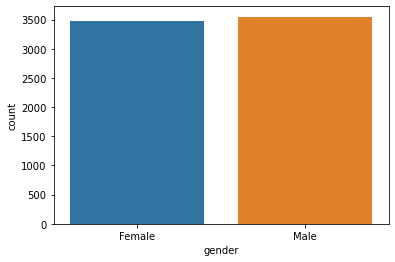

In [36]:
ax=sns.countplot(x='gender',data=df_visualization_nominal)
print(df_visualization_nominal['gender'].value_counts())

from above obeservation,total number of male customer is 3549 and female customer is 3483.

0    5890
1    1142
Name: SeniorCitizen, dtype: int64


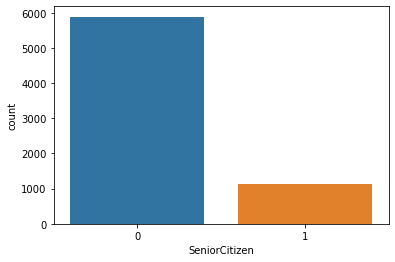

In [37]:
ax=sns.countplot(x='SeniorCitizen',data=df_visualization_nominal)
print(df_visualization_nominal['SeniorCitizen'].value_counts())

from the above observation,total numbers of young customer is 5890 and seniotcitizen is 1142.

No     3639
Yes    3393
Name: Partner, dtype: int64


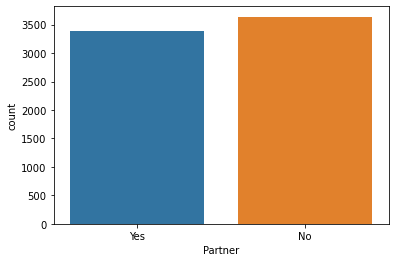

In [38]:
ax=sns.countplot(x='Partner',data=df_visualization_nominal)
print(df_visualization_nominal['Partner'].value_counts())

from above observation,total number of married customer is 3393 and unmarried is 3639.

No     4933
Yes    2099
Name: Dependents, dtype: int64


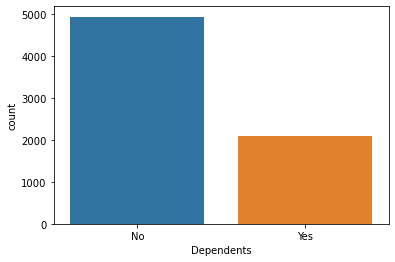

In [39]:
ax=sns.countplot(x='Dependents',data=df_visualization_nominal)
print(df_visualization_nominal['Dependents'].value_counts())

from above observation, total number of dependents customer is 2099 and independent is 4933.

Yes    6352
No      680
Name: PhoneService, dtype: int64


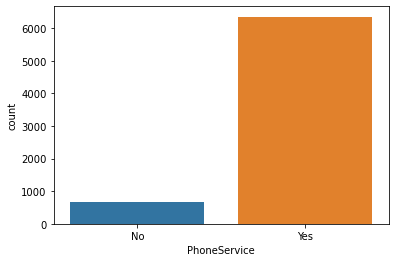

In [40]:
ax=sns.countplot(x='PhoneService',data=df_visualization_nominal)
print(df_visualization_nominal['PhoneService'].value_counts())

from above observation,total number of customer using phone service is 6352 and not using 680.

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64


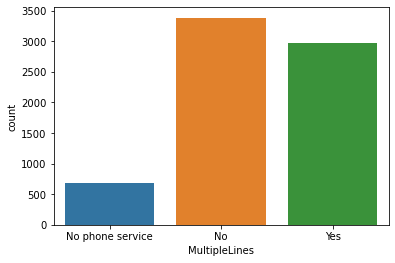

In [41]:
ax=sns.countplot(x='MultipleLines',data=df_visualization_nominal)
print(df_visualization_nominal['MultipleLines'].value_counts())

from above observation,total number of customer using multiplelines is 2967,not using multiplelines is 3385 and not usig phone service is 680.

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64


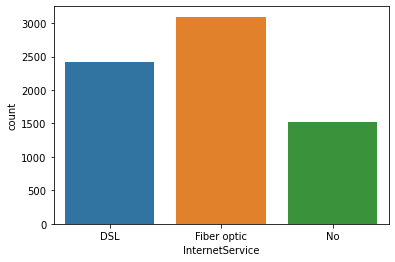

In [42]:
ax=sns.countplot(x='InternetService',data=df_visualization_nominal)
print(df_visualization_nominal['InternetService'].value_counts())

from above observation ,total number of customer using fiber optic  is 3096, using DSL 2416 and not using internet service is 1520.

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64


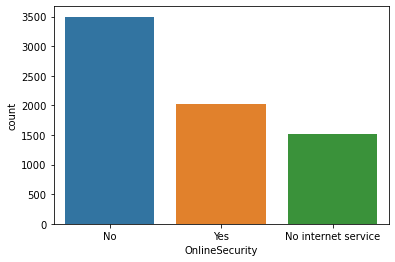

In [43]:
ax=sns.countplot(x='OnlineSecurity',data=df_visualization_nominal)
print(df_visualization_nominal['OnlineSecurity'].value_counts())

from above observation,total number of custome is using onlinesecurity is 2015 and not using online Security is 3497 and not using internet service is 1520.

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64


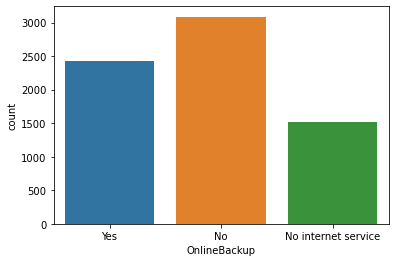

In [44]:
ax=sns.countplot(x='OnlineBackup',data=df_visualization_nominal)
print(df_visualization_nominal['OnlineBackup'].value_counts())

from above observation, total number of customer using onlinebackup is 2425,not using onlinebackup is 3087 and not using internet service is 1520.

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64


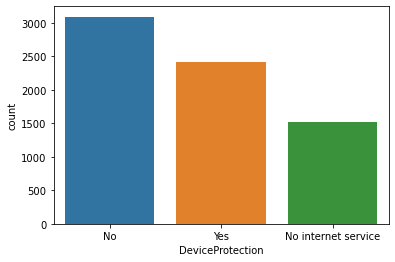

In [45]:
ax=sns.countplot(x='DeviceProtection',data=df_visualization_nominal)
print(df_visualization_nominal['DeviceProtection'].value_counts())

from above observation , total number of customer is using device protection is 2418,not using device protection is 3094 and not using internet service is 1520.

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64


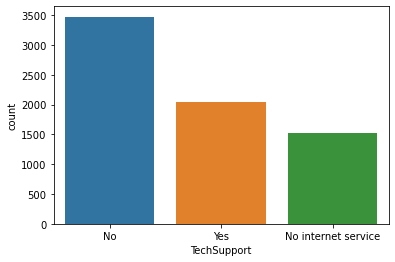

In [46]:
ax=sns.countplot(x='TechSupport',data=df_visualization_nominal)
print(df_visualization_nominal['TechSupport'].value_counts())

from above observation, total number of custome using techsupport is 2040,not using techsupport 3472 and not using internet service is 1520.

No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64


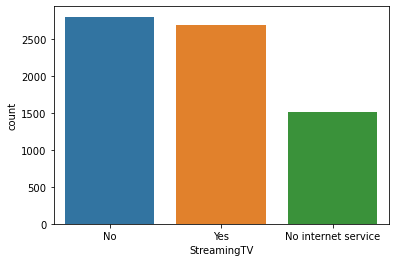

In [47]:
ax=sns.countplot(x='StreamingTV',data=df_visualization_nominal)
print(df_visualization_nominal['StreamingTV'].value_counts())

from above observation , total number of custome using streamingTV is 2703 ,not using streamingTV is 2809 and not using internet service is 1520.

No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64


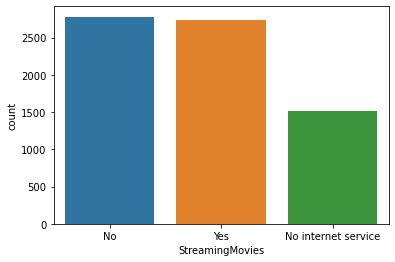

In [48]:
ax=sns.countplot(x='StreamingMovies',data=df_visualization_nominal)
print(df_visualization_nominal['StreamingMovies'].value_counts())

from above observation,total number of customer using streamingmovies is 2731 , not usig streaming movies is 2781 and not using internet service is 1520.

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64


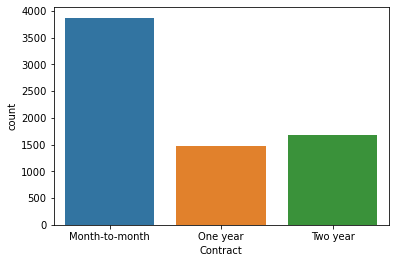

In [49]:
ax=sns.countplot(x='Contract',data=df_visualization_nominal)
print(df_visualization_nominal['Contract'].value_counts())

from above observation, total number of customer having month to month contract is 3875,having two year contract is 1685 and having one year contract is 1472.

Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64


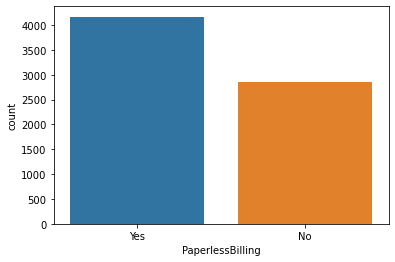

In [50]:
ax=sns.countplot(x='PaperlessBilling',data=df_visualization_nominal)
print(df_visualization_nominal['PaperlessBilling'].value_counts())

from above observation ,total number of customer usig paperlessbilling is 4168 and not using 2864.

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64


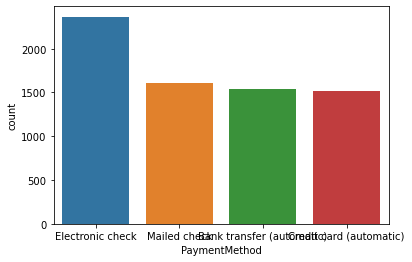

In [51]:
ax=sns.countplot(x='PaymentMethod',data=df_visualization_nominal)
print(df_visualization_nominal['PaymentMethod'].value_counts())

from above observation , total number of custome using electronic check is 2365,using mailed check is 1604, using Bank transfer is 1542 and using credit card is 1521.

No     5163
Yes    1869
Name: Churn, dtype: int64


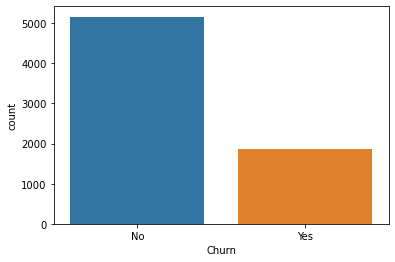

In [52]:
ax=sns.countplot(x='Churn',data=df_visualization_nominal)
print(df_visualization_nominal['Churn'].value_counts())

from above observation ,total nmber of customer is going to be churn is 1869 and not be churn 5163.

for ordinal categorical data we will use lineplots,it will give the flow of the line of the classes of the columns.

# Making dataframe for the ordinal data 

In [53]:
df_visualization_ordinal=df[['customerID','tenure']].copy()

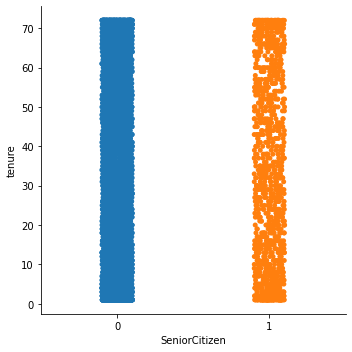

In [54]:
sns.catplot(x='SeniorCitizen', y='tenure',data=df)

checking the distribution of continuos value of the float type columns

In [55]:
df_visualization_continuous=df[['MonthlyCharges','TotalCharges']].copy()

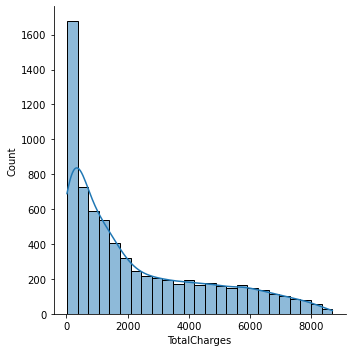

In [56]:
import seaborn as sns
sns.displot(df_visualization_continuous['TotalCharges'],kde=True)

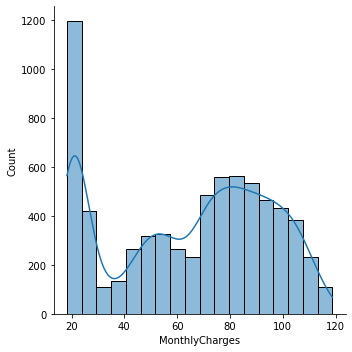

In [57]:
sns.displot(df_visualization_continuous['MonthlyCharges'],kde=True)

since the dataset has a lot of string values.we will use encoding technique to conver the string data to numerical.

# Encodinf of dataframe

In [58]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [59]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [60]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,3953.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2558.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,5524.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,6500.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4843.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1524.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,3358.0,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,5923.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [61]:
df.dtypes

customerID          float64
gender              float64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object

describe the dataset

In [62]:
#only continuous columns
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,3515.500000,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.940557,0.872582,0.789249,...,0.903868,0.796359,0.984926,0.992890,0.688567,0.592719,1.573237,64.798208,2283.300441,0.265785
std,2030.107879,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.948627,0.737271,0.859962,...,0.880178,0.861674,0.885285,0.885385,0.832934,0.491363,1.067504,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1757.750000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.587500,401.450000,0.000000
50%,3515.500000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,5273.250000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.862500,3794.737500,1.000000
max,7031.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [63]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
customerID,7032.0,3515.500000,2030.107879,0.00,1757.7500,3515.500,5273.2500,7031.00
gender,7032.0,0.504693,0.500014,0.00,0.0000,1.000,1.0000,1.00
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
Partner,7032.0,0.482509,0.499729,0.00,0.0000,0.000,1.0000,1.00
Dependents,7032.0,0.298493,0.457629,0.00,0.0000,0.000,1.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
PhoneService,7032.0,0.903299,0.295571,0.00,1.0000,1.000,1.0000,1.00
MultipleLines,7032.0,0.940557,0.948627,0.00,0.0000,1.000,2.0000,2.00
InternetService,7032.0,0.872582,0.737271,0.00,0.0000,1.000,1.0000,2.00
OnlineSecurity,7032.0,0.789249,0.859962,0.00,0.0000,1.000,2.0000,2.00


<AxesSubplot:>

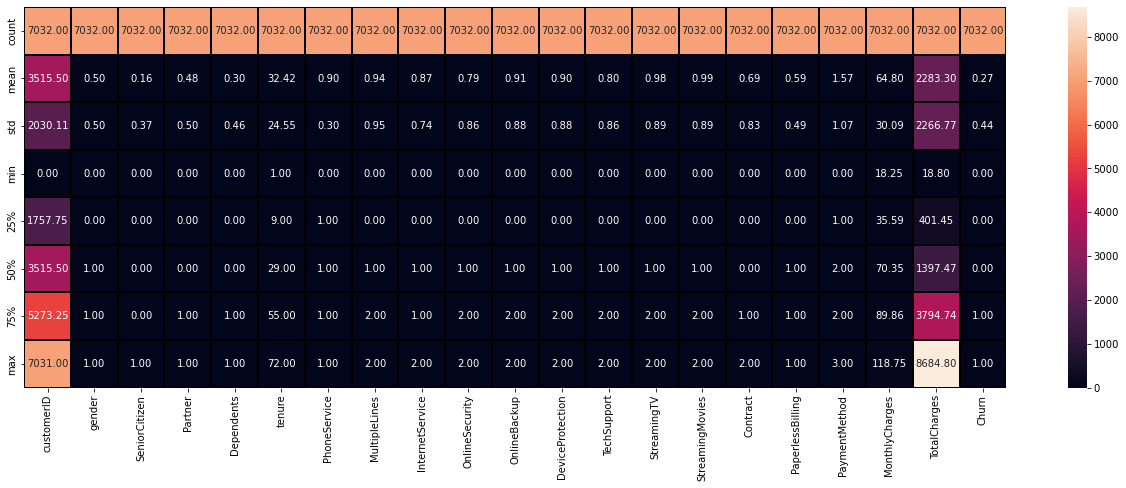

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidth=0.1,linecolor='black',fmt='0.2f')

<AxesSubplot:>

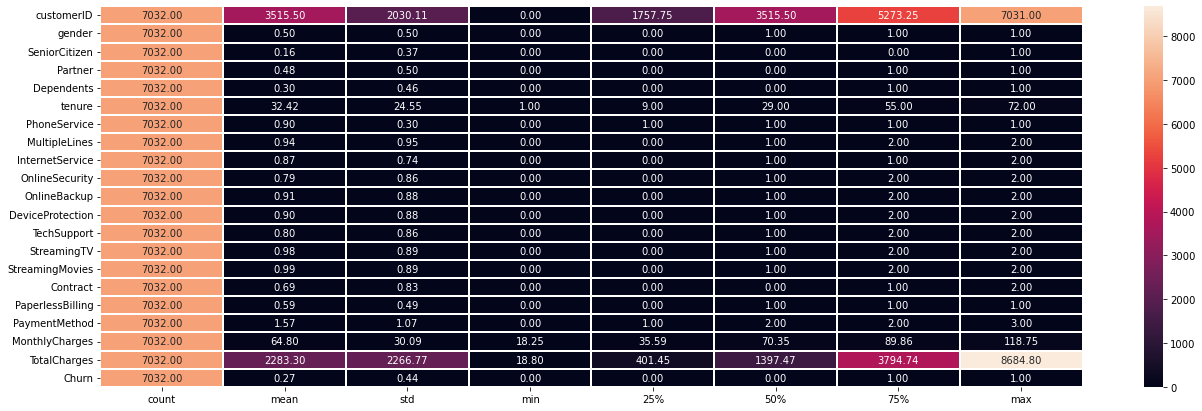

In [65]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe()[:].transpose(),annot=True,linewidth=0.1,linecolor='white',fmt='0.2f')

correlation of the columns with target columns

In [66]:
df.corr()['TotalCharges'].sort_values()

PaymentMethod      -0.330594
Churn              -0.199484
InternetService    -0.175691
customerID         -0.000263
gender              0.000048
Dependents          0.064653
SeniorCitizen       0.102411
PhoneService        0.113008
PaperlessBilling    0.157830
OnlineSecurity      0.254473
TechSupport         0.276890
Partner             0.319072
OnlineBackup        0.375556
DeviceProtection    0.389066
StreamingTV         0.392472
StreamingMovies     0.398088
Contract            0.450306
MultipleLines       0.453202
MonthlyCharges      0.651065
tenure              0.825880
TotalCharges        1.000000
Name: TotalCharges, dtype: float64

<AxesSubplot:>

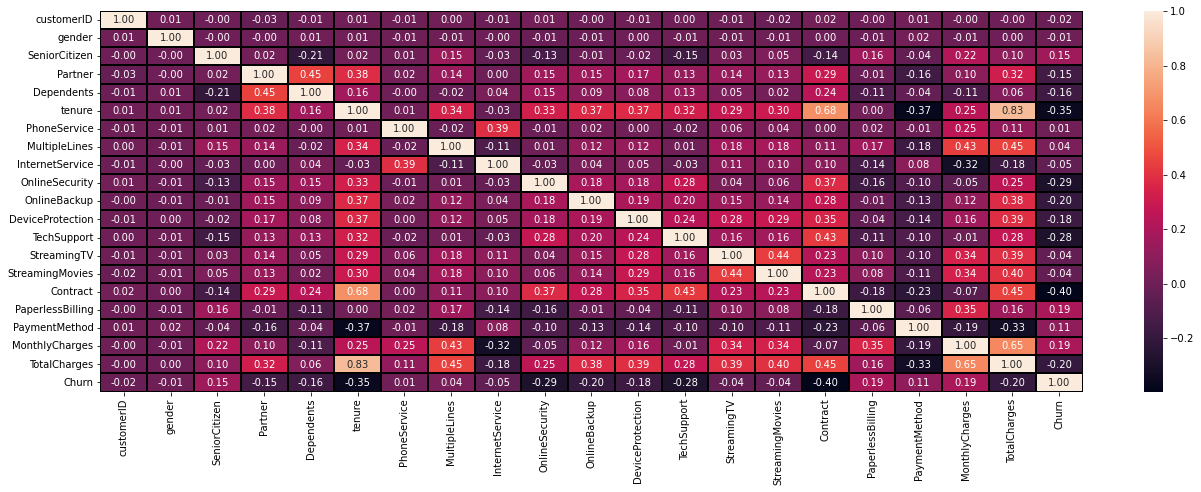

In [67]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor='black',fmt='0.2f')

checking the columns which are positvely and negatively correlated with target columns.

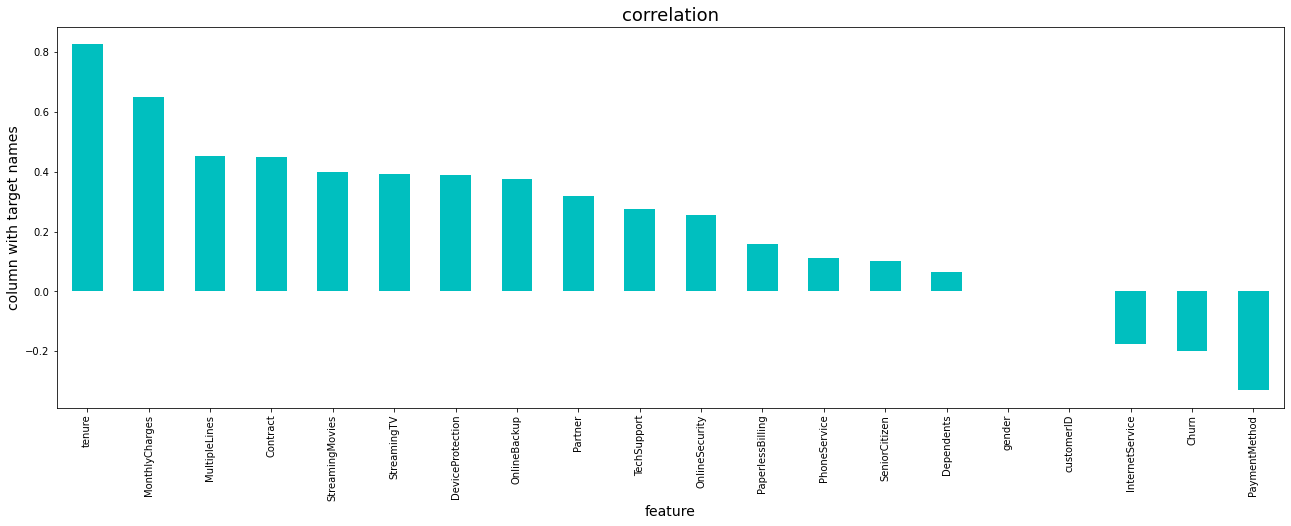

In [69]:
plt.figure(figsize=(22,7))
df.corr()['TotalCharges'].sort_values(ascending=False).drop(['TotalCharges']).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [71]:
df.skew().sort_values()

PhoneService       -2.729727
PaperlessBilling   -0.377503
MonthlyCharges     -0.222103
PaymentMethod      -0.169388
gender             -0.018776
customerID          0.000000
StreamingMovies     0.013851
StreamingTV         0.029366
Partner             0.070024
MultipleLines       0.118623
OnlineBackup        0.184089
DeviceProtection    0.188013
InternetService     0.205704
tenure              0.237731
TechSupport         0.403966
OnlineSecurity      0.418619
Contract            0.635149
Dependents          0.880908
TotalCharges        0.961642
Churn               1.060622
SeniorCitizen       1.831103
dtype: float64

keeping +/-0.5 as the range for skewness,here are the columns which does not lie in this range.

.seniorcitizen - categorical
.Dependents - categorical
.phoneservice- categorical
.contract - categorical
.TotalCharges- target variable
.Churn - categorical

since,no column has skewness,we will not treat that.

# Outliers check:

In [72]:
df.dtypes

customerID          float64
gender              float64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object

checking the outliers on the int and float types of columns.

<AxesSubplot:>

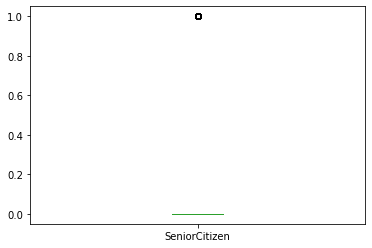

In [73]:
df['SeniorCitizen'].plot.box()

<AxesSubplot:>

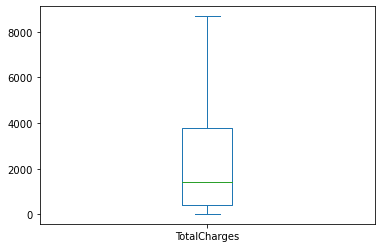

In [74]:
df['TotalCharges'].plot.box()

<AxesSubplot:>

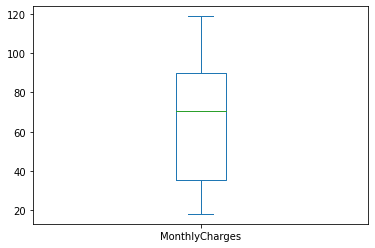

In [75]:
df['MonthlyCharges'].plot.box()

<AxesSubplot:>

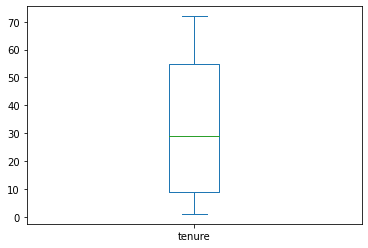

In [76]:
df['tenure'].plot.box()

In [77]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

since the column seniorcitizen has nominal type,we cannot consider its datapoint as outlier.

considering the outlier removal.

In [78]:
df.shape

(7032, 21)

In [79]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  494,  497,  543,
         568,  595,  609,  615,  619,  633,  659,  666,  668,  673,  676,
         687,  715,  717,  734,  763,  774,  782,  788,  792,  811,  827,
         841,  845,  857,  864,  871,  873,  875,  882,  891,  915,  932,
         938,  940,  957,  970, 1008, 1015, 1034, 1047, 1048, 1050, 1069,
        1106, 1115, 1118, 1140, 1142, 1146, 1157, 1165, 1178, 1200, 1217,
        1221, 1238, 1251, 1253, 1267, 1274, 1294, 1307, 1322, 1327, 1329,
        1330, 1344, 1347, 1360, 1374, 1397, 1402, 1411, 1447, 1474, 1475,
        1476, 1495, 1501, 1508, 1514, 1555, 1557, 1576, 1579, 1609, 1615,
        1629, 1632, 1647, 1684, 1687, 

In [81]:
df['PhoneService'].unique()

array([0., 1.])

separating the columns into features and target

In [82]:
features=df.drop('TotalCharges',axis=1)
target=df['TotalCharges']

scaling the data using min-max scaler

In [84]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [85]:
import warnings
warnings.filterwarnings('ignore')

In [87]:
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state {i}, the training accuracy is:- {r2_score(target_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is:- {r2_score(target_test,pred_test)}")
    print("\n")

At random state 0, the training accuracy is:- 0.9078230851610491
At random state 0, the testing accuracy is:- 0.9019350681812429


At random state 1, the training accuracy is:- 0.9079565858548316
At random state 1, the testing accuracy is:- 0.9008829074307736


At random state 2, the training accuracy is:- 0.9063273036929633
At random state 2, the testing accuracy is:- 0.9079110655042171


At random state 3, the training accuracy is:- 0.9072540285854458
At random state 3, the testing accuracy is:- 0.9038939143430855


At random state 4, the training accuracy is:- 0.9085350497474927
At random state 4, the testing accuracy is:- 0.8983071339834157


At random state 5, the training accuracy is:- 0.9078141009722713
At random state 5, the testing accuracy is:- 0.9012496112418962


At random state 6, the training accuracy is:- 0.9065655306190831
At random state 6, the testing accuracy is:- 0.9067989147246636


At random state 7, the training accuracy is:- 0.9060680146120199
At random state 7,

At random state 65, the testing accuracy is:- 0.9081439215352546


At random state 66, the training accuracy is:- 0.9065282143647411
At random state 66, the testing accuracy is:- 0.9069169725549321


At random state 67, the training accuracy is:- 0.9069554203887461
At random state 67, the testing accuracy is:- 0.9052452249650176


At random state 68, the training accuracy is:- 0.9069432637340366
At random state 68, the testing accuracy is:- 0.9054534853998477


At random state 69, the training accuracy is:- 0.907254094998999
At random state 69, the testing accuracy is:- 0.9040100706365358


At random state 70, the training accuracy is:- 0.906046081675353
At random state 70, the testing accuracy is:- 0.9088551539046299


At random state 71, the training accuracy is:- 0.9064367331116585
At random state 71, the testing accuracy is:- 0.9074852203680155


At random state 72, the training accuracy is:- 0.9081816093421038
At random state 72, the testing accuracy is:- 0.9001530175165442


At r

In [88]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=12)

In [89]:
#trainig the model
lr.fit(features_train,target_train)

LinearRegression()

In [90]:
pred_test=lr.predict(features_test)

In [91]:
print(r2_score(target_test,pred_test))

0.9046238705777879


# cross validation of the model

In [93]:
train_accuracy=r2_score(target_train,pred_train)
test_accuracy=r2_score(target_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and accuracy for the testing {test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.9056853759998242 and accuracy score for training is -0.8612455915647186 and accuracy for the testing 0.9046238705777879


At cross fold 3 the cv score is 0.9060689054485597 and accuracy score for training is -0.8612455915647186 and accuracy for the testing 0.9046238705777879


At cross fold 4 the cv score is 0.906052281618998 and accuracy score for training is -0.8612455915647186 and accuracy for the testing 0.9046238705777879


At cross fold 5 the cv score is 0.9060785914102271 and accuracy score for training is -0.8612455915647186 and accuracy for the testing 0.9046238705777879


At cross fold 6 the cv score is 0.9061171892115527 and accuracy score for training is -0.8612455915647186 and accuracy for the testing 0.9046238705777879


At cross fold 7 the cv score is 0.9059910991780916 and accuracy score for training is -0.8612455915647186 and accuracy for the testing 0.9046238705777879


At cross fold 8 the cv score is 0.9059336238398121 and accuracy s

since the number of folds do not have such impact on the accuracy and cv_score.so cv=6 selected.

here we have handle the problem of the overfitting and the underfitting by checking the training and testing score.

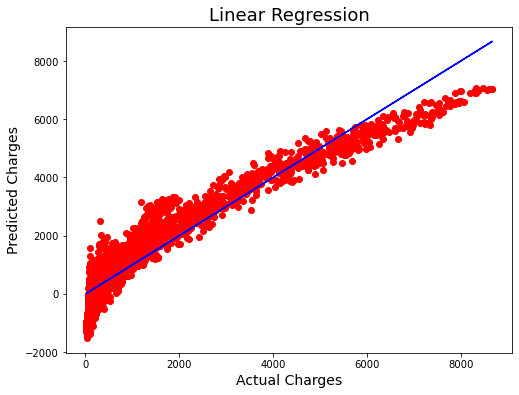

In [95]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual Charges',fontsize=14)
plt.ylabel('Predicted Charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

Best fit line is covering the most of the datapoints which shows good fit for our model.

# Regularization

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [97]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],
           'random_state':list(range(0,10))}

ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)


{'alpha': 1, 'random_state': 0}


In [99]:
#final model trainig
ls=Lasso(alpha=1,random_state=0)
ls.fit(features_train,target_train)
ls_score_training=ls.score(features_train,target_train)
pred_ls=ls.predict(features_test)
ls_score_training*100

90.708551259518

In [100]:
pred_ls=ls.predict(features_test)

In [101]:
lss=r2_score(target_test,pred_ls)

In [102]:
lss*100

90.45396929310161

In [103]:
cv_score=cross_val_score(ls,features,target,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

90.60742480797772

# Ensemble technique

In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters= {'criterion':['mse','mae'],
            'max_features':['auto','sqrt','log2']}

rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [105]:
rf=RandomForestRegressor(criterion='mae',max_features='auto')
rf.fit(features_train,target_train)
training_r2=rf.score(features_train,target_train)
pred_decision=rf.predict(features_test)

print('training r2',training_r2)

rfs=r2_score(target_test,pred_decision)
print('R2 score:',rfs*100)

rfscore=cross_val_score(rf,features,target,cv=5)
rfc=rfscore.mean()

print('cross val scor',rfc*100)

training r2 0.9998184464613604
R2 score: 99.87113058553041
cross val scor 99.87641314489511


In [ ]:
we are getting model accuracy and cross validation both as 99.8% which shows our model is performing extremely well.

In [106]:
#saving model
import pickle
filename='Churn.pkl'
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [107]:
loaded_model=pickle.load(open('Churn.pkl','rb'))
result=loaded_model.score(features_test,target_test)
print(result*100)

99.87113058553041


In [108]:
conclusion=pd.DataFrame([loaded_model.predict(features_test)[:],pred_decision[:]],index=['predicted','original'])

In [110]:
conclusion.transpose()

,predicted,original
0,1713.1760,1713.1760
1,321.0265,321.0265
2,912.7425,912.7425
3,18.9220,18.9220
4,230.3735,230.3735
...,...,...
1402,142.8980,142.8980
1403,3129.9345,3129.9345
1404,6315.2390,6315.2390
1405,935.0695,935.0695
